In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape 

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels[1:]

array([0, 0, 3, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

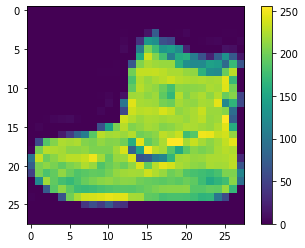

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

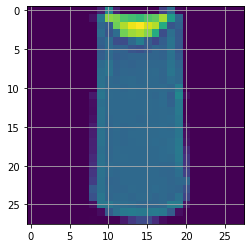

In [ ]:
plt.figure()
plt.imshow(train_images[2])
plt.grid(True)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

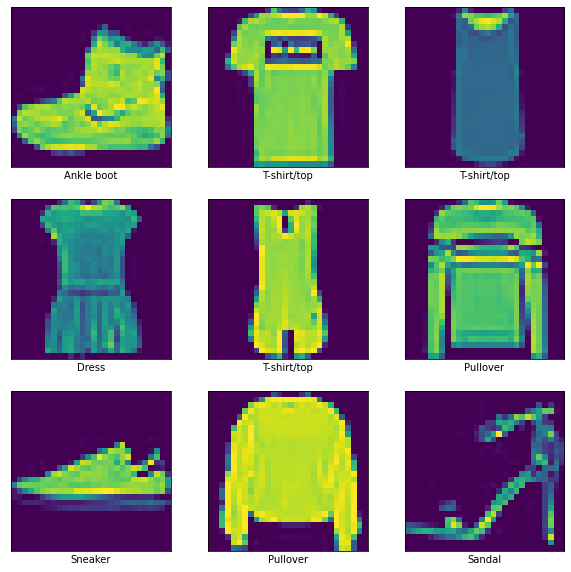

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

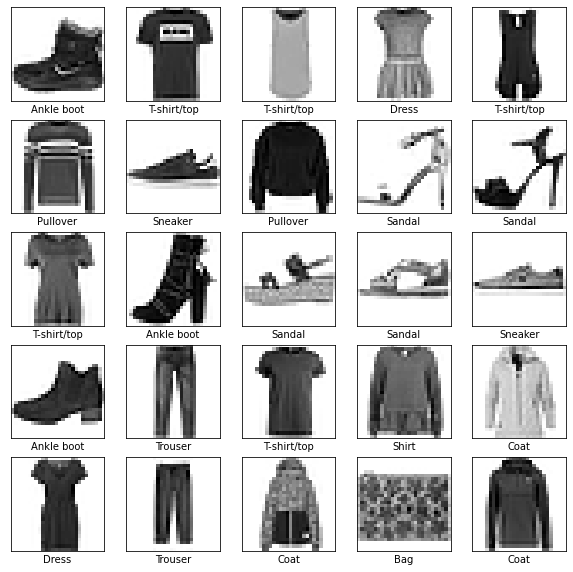

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.output_shape

(None, 10)

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
history=model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5033 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3741 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3105 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2688 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2475 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.238

In [ ]:
history.history

{'accuracy': [0.824400007724762,
  0.865933358669281,
  0.8770999908447266,
  0.8865166902542114,
  0.892383337020874,
  0.8970333337783813,
  0.8995166420936584,
  0.9054666757583618,
  0.9075666666030884,
  0.9118333458900452],
 'loss': [0.5032845735549927,
  0.37411123514175415,
  0.3349619507789612,
  0.31053704023361206,
  0.2937135100364685,
  0.27956318855285645,
  0.2688404619693756,
  0.25661855936050415,
  0.2474565953016281,
  0.2383631020784378]}

Text(0.5, 1.0, 'Train - Accuracy')

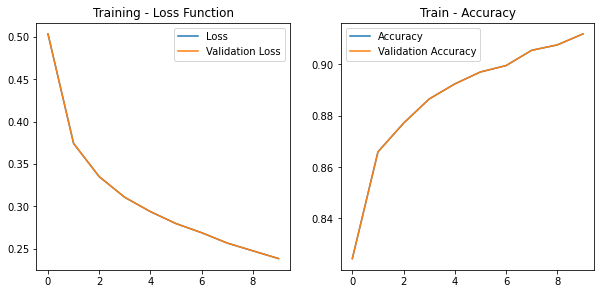

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
model.output_shape

(None, 10)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest Loss    :', test_loss)

313/313 - 0s - loss: 0.3600 - accuracy: 0.8776

Test accuracy: 0.8776000142097473

Test Loss    : 0.3599531054496765


In [ ]:
score = model.evaluate(test_images,  test_labels, verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3600
Test Accuracy : 0.8776


In [ ]:
score

[0.3599531054496765, 0.8776000142097473]

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
print(predictions)

[[5.19605727e-08 1.25868708e-11 9.65369895e-10 ... 1.07996007e-02
  2.40609364e-08 9.88693535e-01]
 [3.18646817e-05 1.50969276e-12 9.99059379e-01 ... 1.08591727e-12
  5.44995160e-09 8.69233071e-14]
 [1.31400615e-08 1.00000000e+00 1.19723975e-09 ... 7.41267448e-26
  1.09420068e-13 3.23524361e-20]
 ...
 [1.58970826e-04 3.06262238e-11 6.75119663e-05 ... 2.03276440e-09
  9.99442279e-01 1.74117123e-13]
 [1.07147358e-07 9.99984741e-01 2.11167634e-08 ... 9.55007837e-16
  2.87540503e-09 3.55891120e-12]
 [1.86258494e-05 1.23684196e-09 2.67591901e-07 ... 1.89119671e-03
  2.71610479e-05 6.62241655e-06]]


In [ ]:
predictions[10]

array([2.2936951e-04, 4.1936977e-07, 6.9073163e-02, 7.8127323e-06,
       8.9088899e-01, 2.4938888e-08, 3.9790601e-02, 4.2655847e-07,
       6.2488803e-06, 2.9135863e-06], dtype=float32)

In [ ]:
np.argmax(predictions[100])

3

In [ ]:
for i in range(100):
  print( test_labels[i], np.argmax(predictions[i]),   class_names[np.argmax(predictions[i])])

9 9 Ankle boot
2 2 Pullover
1 1 Trouser
1 1 Trouser
6 6 Shirt
1 1 Trouser
4 4 Coat
6 6 Shirt
5 5 Sandal
7 7 Sneaker
4 4 Coat
5 5 Sandal
7 5 Sandal
3 3 Dress
4 2 Pullover
1 1 Trouser
2 2 Pullover
4 2 Pullover
8 8 Bag
0 0 T-shirt/top
2 2 Pullover
5 5 Sandal
7 7 Sneaker
9 5 Sandal
1 1 Trouser
4 2 Pullover
6 6 Shirt
0 0 T-shirt/top
9 9 Ankle boot
3 3 Dress
8 8 Bag
8 8 Bag
3 3 Dress
3 3 Dress
8 8 Bag
0 0 T-shirt/top
7 7 Sneaker
5 5 Sandal
7 7 Sneaker
9 9 Ankle boot
6 6 Shirt
1 1 Trouser
3 3 Dress
7 7 Sneaker
6 6 Shirt
7 7 Sneaker
2 2 Pullover
1 1 Trouser
2 6 Shirt
2 6 Shirt
4 4 Coat
4 2 Pullover
5 5 Sandal
8 8 Bag
2 2 Pullover
2 2 Pullover
8 8 Bag
4 6 Shirt
8 8 Bag
0 0 T-shirt/top
7 7 Sneaker
7 7 Sneaker
8 8 Bag
5 5 Sandal
1 1 Trouser
1 1 Trouser
2 3 Dress
3 4 Coat
9 7 Sneaker
8 8 Bag
7 7 Sneaker
0 0 T-shirt/top
2 2 Pullover
6 6 Shirt
2 2 Pullover
3 3 Dress
1 1 Trouser
2 2 Pullover
8 8 Bag
4 4 Coat
1 1 Trouser
8 8 Bag
5 5 Sandal
9 9 Ankle boot
5 5 Sandal
0 0 T-shirt/top
3 3 Dress
2 2 Pullov

In [ ]:
test_labels[10]

4

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

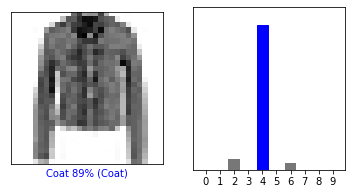

In [ ]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

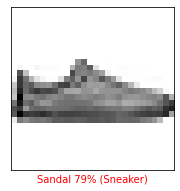

In [ ]:
i = 12
plt.figure(figsize=(6,3))

plot_image(i, predictions[i], test_labels, test_images)

plt.show()

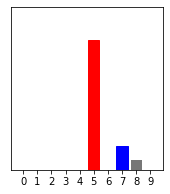

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

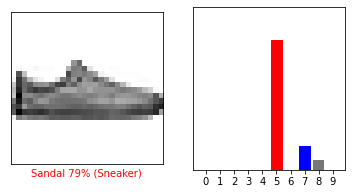

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

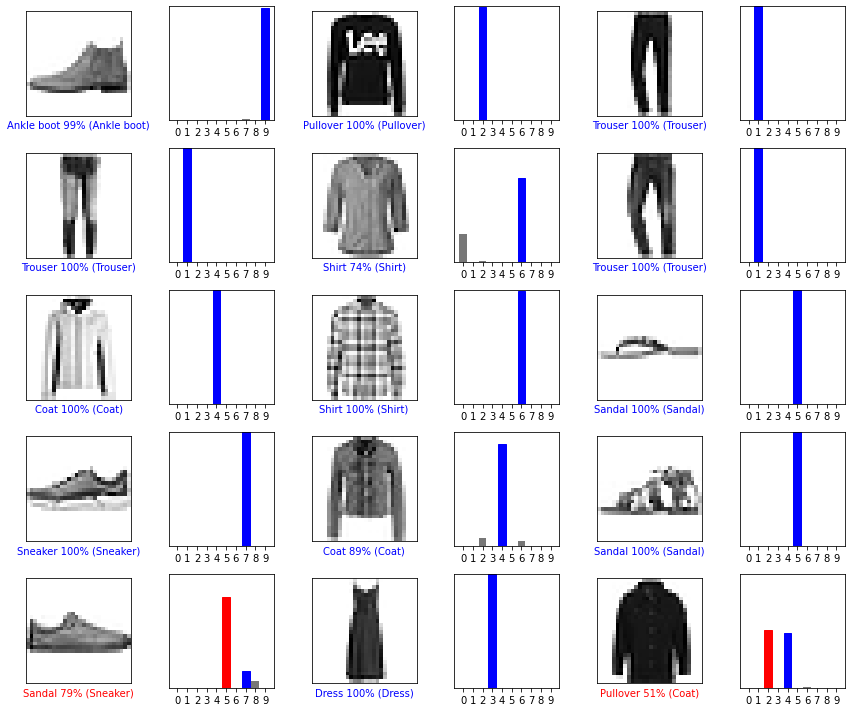

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[8]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.2532944e-07 4.4564102e-11 2.1352238e-09 6.5389621e-10 2.8218952e-09
  9.9999869e-01 2.2447917e-09 1.0140118e-06 9.8168648e-08 4.8314425e-10]]


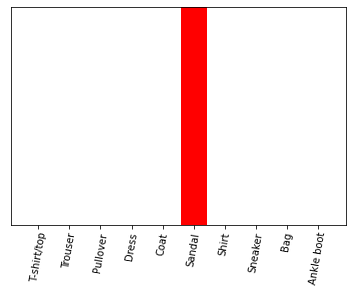

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=80)

In [ ]:
np.argmax(predictions_single[0])

5

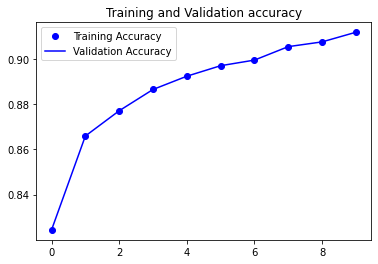

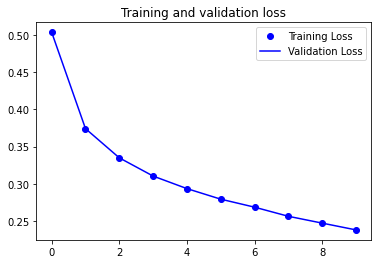

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()